In [2]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([2, 3, 4, 5])
a @ b

40

In [3]:
import tensorflow as tf

class DuplicateLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(DuplicateLayer, self).__init__()

    def call(self, inputs):
        return tf.concat([inputs, inputs], axis=-1)

# Test the custom layer
input_data = tf.constant([[1, 3, 3, 4, 5]], dtype=tf.float32)
custom_layer = DuplicateLayer()
output_data = custom_layer(input_data)
print(output_data)


tf.Tensor([[1. 3. 3. 4. 5. 1. 3. 3. 4. 5.]], shape=(1, 10), dtype=float32)


In [4]:
import numpy as np 

z = np.array([[[1, 2, 3], [2, 4, 5], [6, 4, 3]], [[1, 2, 3], [2, 4, 5], [6, 4, 3]]])

print(z)
print(np.shape(z))
print(z[1, 2])
print(z[1][2])

[[[1 2 3]
  [2 4 5]
  [6 4 3]]

 [[1 2 3]
  [2 4 5]
  [6 4 3]]]
(2, 3, 3)
[6 4 3]
[6 4 3]


In [5]:
import numpy as np 

a = np.array([1, 2, 4])
a[0:1]
b = np.array([1+5j, 2+3j])
np.conjugate(b)

array([1.-5.j, 2.-3.j])

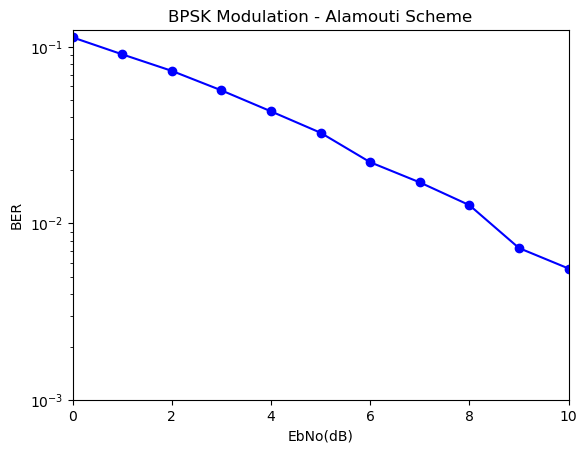

In [6]:
from time import time
from numpy import sqrt
import random
import matplotlib.pyplot as plt

t=time()

N = 10000
EbNodB_range = range(0, 11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    noise_std = 1/sqrt(2*EbNo)
    noise_mean = 0
    
    no_errors = 0
    for m in range (0, N):
        tx_symbol1 = (2*random.randint(0,1)-1)
        tx_symbol2 = (2*random.randint(0,1)-1)
                
        noise1 = (random.gauss(noise_mean, noise_std)+
                1j*random.gauss(noise_mean, noise_std))
        noise2 = (random.gauss(noise_mean, noise_std)+
                1j*random.gauss(noise_mean, noise_std))
        
        
        ch_coeff1 = (random.gauss(0,1/sqrt(2))+
                    1j*random.gauss(0,1/sqrt(2)))
        ch_coeff2 = (random.gauss(0,1/sqrt(2))+
                    1j*random.gauss(0,1/sqrt(2)))
        
        rx_symbol1 =  ((1/sqrt(2))*tx_symbol1*ch_coeff1+ 
                       (1/sqrt(2))*tx_symbol2*ch_coeff2 + noise1)
        rx_symbol2 = (-(1/sqrt(2))*tx_symbol2*ch_coeff1+ 
                       (1/sqrt(2))*tx_symbol1*ch_coeff2 + noise2)
        
        estimate1 = (ch_coeff1.conjugate()*rx_symbol1+
                     ch_coeff2*rx_symbol2.conjugate())
        estimate2 = (ch_coeff2.conjugate()*rx_symbol1-
                     ch_coeff1*rx_symbol2.conjugate())
        
        det_symbol1 = 2*(estimate1.real >= 0) - 1
        det_symbol2 = 2*(estimate2.real >= 0) - 1
        
        no_errors += 1*(tx_symbol1 != det_symbol1)+1*(tx_symbol2 != det_symbol2)  
          
    ber[n] = 1.0*no_errors/(2*N)
        
plt.plot(EbNodB_range, ber, 'bo-')
plt.axis([0, 10, 0.001, 0.125])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
#plt.grid(True)
plt.title('BPSK Modulation - Alamouti Scheme')
plt.show()